# Hypothesis Testing, p-value & Confidence Intervals, Exploratory Data Analysis In Python Statistics

## Hypothesis Testing

Standard imports

In [1]:
import math
import io

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [3]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [4]:
pumps = pd.read_csv('data/pumps.xls')

In [5]:
pumps

,lat,lon,x,y
0,51.513341,-0.136668,0.000000,0.000000
1,51.513876,-0.139586,-0.201858,0.059469
2,51.514906,-0.139671,-0.207738,0.173961
3,51.512354,-0.131630,0.348513,-0.109712
4,51.512139,-0.133594,0.212650,-0.133611
5,51.511542,-0.135919,0.051813,-0.199972
6,51.510019,-0.133962,0.187193,-0.369265
7,51.511295,-0.138199,-0.105910,-0.227428


In [6]:
cholera = pd.read_csv('data/cholera.xls')

In [7]:
cholera.head()

,deaths,lat,lon,x,y,closest
0,3,51.513418,-0.137930,-0.087301,0.008559,0
1,2,51.513361,-0.137883,-0.084050,0.002223,0
2,1,51.513317,-0.137853,-0.081975,-0.002668,0
3,1,51.513262,-0.137812,-0.079138,-0.008781,0
4,4,51.513204,-0.137767,-0.076025,-0.015229,0


In [8]:
cholera.loc[0::20]

,deaths,lat,lon,x,y,closest
0,3,51.513418,-0.137930,-0.087301,0.008559,0
20,2,51.513441,-0.138762,-0.144856,0.011116,1
40,2,51.513025,-0.139036,-0.163811,-0.035126,1
60,1,51.512765,-0.137533,-0.059838,-0.064027,0
80,1,51.512782,-0.136819,-0.010446,-0.062137,0
100,4,51.512250,-0.135394,0.088131,-0.121273,5
120,1,51.513238,-0.134594,0.143473,-0.011449,4
140,1,51.512585,-0.134793,0.129707,-0.084035,4
160,1,51.514065,-0.134364,0.159384,0.080478,0
180,1,51.515149,-0.135395,0.088062,0.200973,0


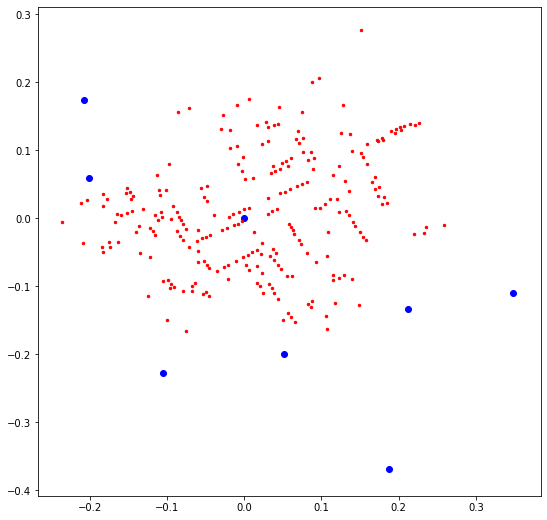

In [9]:
pp.figure(figsize=(9, 9))
pp.scatter(pumps.x, pumps.y, color='b')
pp.scatter(cholera.x, cholera.y, color='r', s=6)

In [10]:
img = matplotlib.image.imread('data/london.png')

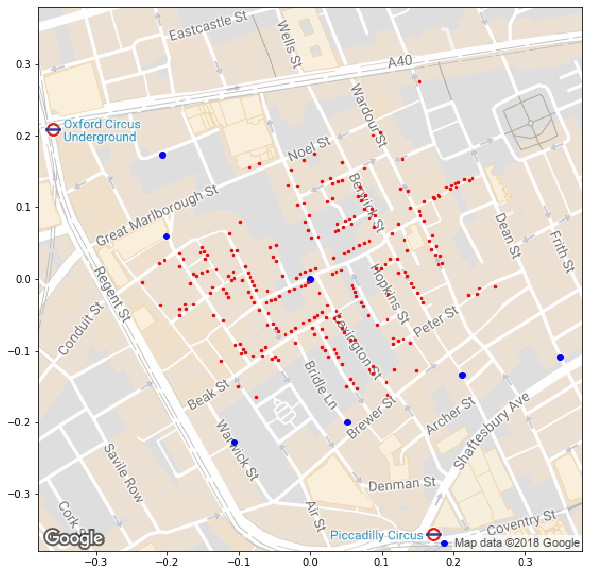

In [11]:
pp.figure(figsize=(10, 10))
pp.imshow(img, extent=[-0.38, 0.38, -0.38, 0.38])
pp.scatter(pumps.x, pumps.y, color='b')
pp.scatter(cholera.x, cholera.y, color='r', s=6)

In [12]:
cholera.closest.value_counts()

0    171
1     36
4     19
5     13
7      9
2      2
Name: closest, dtype: int64

In [13]:
cholera.groupby('closest').deaths.sum()

closest
0    340
1     65
2      5
4     40
5     27
7     12
Name: deaths, dtype: int64

In [14]:
def simulate(n):
    return pd.DataFrame({'closest':
          np.random.choice(
              [0, 1, 4, 5], 
              size=n,
              p=[0.65, 0.15, 0.10, 0.10]
          )               
    })

In [15]:
simulate(489).closest.value_counts()

0    334
1     74
5     43
4     38
Name: closest, dtype: int64

In [16]:
sampling = pd.DataFrame({'counts': [
    simulate(489).closest.value_counts()[0] for _ in range(10_000)
]})

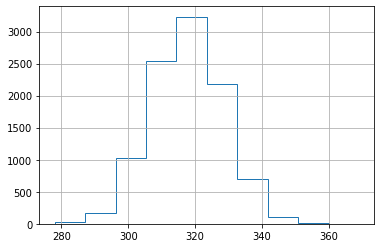

In [17]:
sampling.counts.hist(histtype='step')

In [18]:
scipy.stats.percentileofscore(sampling.counts, 340)

98.29

In [19]:
pvalue = 100 - scipy.stats.percentileofscore(sampling.counts, 340)

# p values & confidence intervals

In [20]:
poll = pd.read_csv('data/poll.csv')

In [21]:
poll.head()

,vote
0,Brown
1,Green
2,Brown
3,Brown
4,Brown


In [22]:
poll.vote.value_counts(normalize=True)

Brown    0.511
Green    0.489
Name: vote, dtype: float64

Null hypotthesis H0 is Green wins or ties the election.

In [23]:
def sample(brown, n=1_000):
    return pd.DataFrame({'vote': np.where(
        np.random.rand(n) < brown, 'Brown', 'Green'
    )})

In [24]:
sample(0.5).vote.value_counts(normalize=True)

Brown    0.521
Green    0.479
Name: vote, dtype: float64

In [54]:
dist = pd.DataFrame({'Brown': [
    sample(0.5).vote.value_counts(normalize=True)['Brown']
    for _ in range(10_000)
]})

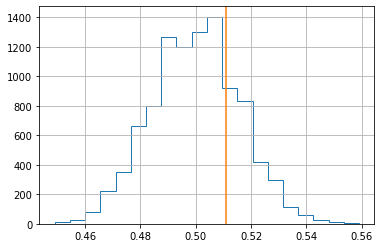

In [55]:
dist.Brown.hist(histtype='step', bins=20)
pp.axvline(
    poll.vote.value_counts(normalize=True)['Brown'], 
    c='C1'
)

In [56]:
100- scipy.stats.percentileofscore(dist.Brown, 0.511)

23.724999999999994

In [57]:
largepoll = pd.read_csv('data/poll-larger.csv')

In [58]:
largepoll.vote.value_counts(normalize=True)

Green    0.5181
Brown    0.4819
Name: vote, dtype: float64

In [59]:
dist = pd.DataFrame({'Green': [
    sample(0.5, 10_0000).vote.value_counts(normalize=True)['Green']
    for _ in range(1_000)
]})

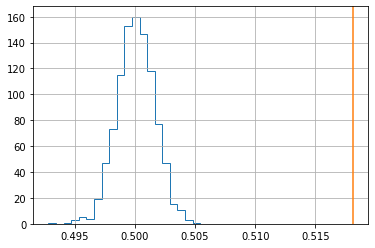

In [60]:
dist.Green.hist(histtype='step', bins=20)
pp.axvline(
    largepoll.vote.value_counts(normalize=True)['Green'], 
    c='C1'
)